## <center>COMP20008 - 2018 - SM2 - Project Phase 1</center>
<center>Release Date: 11:59am Monday, $13^{th}$ August 2018</center>
<center>Due Date: 11:59am Friday, $31^{st}$ August 2018</center>
<center>Submission is via the LMS</center>
<span style="color:red">Please, make sure you get a submission confirmation email once you submit your assignment. Otherwise, it will be considered as a late submission.</span> 

#### Phase 1: Warmup - Python Exercises (20 marks, worth 20% of subject grade) 

In this phase, you will practice your Python wrangling skills with a publicly available dataset. The dataset is obtained through the TMDB (The Movie DB) API. It contains information on movies featured in the Full MovieLens Dataset and released on or before July 2017. The main features of the Movies Metadata file include posters, backdrops, budget, revenue, release dates, languages, production countries and companies. 

You will be working with the following dataset in this phase: 
- Movies\_tmdb.csv: It has a set of movie records (approx. 45,000), released **on or before July 2017**. Note that this dataset is quite large, and you may find it beneficial during development, to first test your code on a smaller sample of this data.

Libraries to use are Pandas and Matplotlib. You will need to write Python 3 code and work with Series and DataFrames discussed in workshop week 2 and data cleaning and basic visualisations covered in workshop weeks 3-4. If you are using other packages, you must provide an explanation in your code about why it is necessary.

### Import Required Python Libraries and Load the Data 

Please write here all the Python libraries you will be using! Also load the dataset (.csv) in a dataframe object.

In [1]:
#import ....
%matplotlib inline
import pandas as pd
import numpy as np
import json
import ast
import matplotlib
import matplotlib.pyplot as plt
import calendar
from pandas.plotting import parallel_coordinates

movies_df =  pd.read_csv('Movies_tmdb.csv', low_memory=False)


### 1 Understanding the Dataset <span style="color:red">**(3 Marks)**</span> 

1.1 Print the number of movies, number of attributes/columns, column names and datatypes. The output of this step should look like **(2 Marks)** 

    *** 
    Q1.1 
    Number of movies: # 
    Number of attributes/columns: #
    Column names: #
    Column datatypes: #
    ***
where # is the values/strings you find.

In [2]:
### answer Q1.1

print('Q1.1')
print('Number of movies: ', len(movies_df), '\n')
print('Number of attributes/columns: ', movies_df.shape[1], '\n')
print('Column names: \n', list(movies_df.columns.values),'\n')
print('Column datatypes: \n', movies_df.dtypes)


Q1.1
Number of movies:  45465 

Number of attributes/columns:  24 

Column names: 
 ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'] 

Column datatypes: 
 adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  fl

1.2 In this assignment, we won't be using all the features (i.e. columns) which are included in the csv file, so create a new dataframe with the following columns: **(1 Marks)** 

\begin{array} {|r|r|r|r|r|r|r|}
\hline
title & genre & release\_date & runtime & budget &  revenue & original\_language \\
\hline
\end{array}

\begin{array} {|r|r|r|r|r|r|}
\hline
popularity & vote\_average & vote\_count & adult & production\_countries \\
\hline
\end{array}

You must keep the order of the columns as provided above. 
Output of this question should be printing the first TWO rows (i.e. movies) from the new created dataframe in the following format:

    *** 
    Q1.2
    The first two rows from the filtered movies dataframe are:
    #
    #
    ***
    
where each # represents one movie row.


In [3]:
### answer Q1.2

# select specified attributes from original dataframe and put into a new dataframe

headers = ['title', 'genres', 'release_date', 'runtime', 'budget', 'revenue', 'original_language', 'popularity', 'vote_average', 'vote_count','adult', 'production_countries']
movies = movies_df.loc[:,headers]

print('Q1.2 \nThe first two rows from the filtered movies dataframe are:')
movies.head(2)


Q1.2 
The first two rows from the filtered movies dataframe are:


,title,genres,release_date,runtime,budget,revenue,original_language,popularity,vote_average,vote_count,adult,production_countries
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30/10/95,81.0,30000000,373554033.0,en,21.946943,7.7,5415.0,FALSE,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",15/12/95,104.0,65000000,262797249.0,en,17.015539,6.9,2413.0,FALSE,"[{'iso_3166_1': 'US', 'name': 'United States o..."


### 2 Missing Values and Data Types <span style="color:red">**(5 Marks)**</span>

2.1 Most of the columns in the movies dataframe have object datatype, let's convert the **"popularity"** column to float64 datatype, **"title"** column to string and **"adult"** column to boolean. **(1 Mark)**

The output of this step should print the datatypes of all columns in the movies dataframe after the conversion. You should follow the following format:

    *** 
    Q2.1 Datatypes after conversion:
    # 
    ***

where # should be the datatypes of the dataframe columns. Note: You don't have to create a new dataframe for this question, instead you can use the same dataframe which you created in Q1.2. 

In [4]:
### answer Q2.1

movies['popularity'] = movies['popularity'].apply(pd.to_numeric)
movies.replace('FALSE', False, inplace = True) #replace string representation of False with boolean value
movies.replace('TRUE', True, inplace = True) #replace string representation of True with boolean value
movies['adult'] = movies['adult'].astype(bool)
movies['title'] = movies['title'].astype(str)

print('Q2.1 Datatypes after conversion:')
movies.dtypes


Q2.1 Datatypes after conversion:


title                    object
genres                   object
release_date             object
runtime                 float64
budget                   object
revenue                 float64
original_language        object
popularity              float64
vote_average            float64
vote_count              float64
adult                      bool
production_countries     object
dtype: object

2.2 Now, we will deal with the missing values as a preprocessing step before performing any further analysis. Let's first print the total number of missing values for each column separately. Following this, you should print the percentage of movies with incomplete data in any of its attributes (i.e. missing values). Note: A movie is considered incomplete record if it has a missed value in at least one of its features. **(2 Marks)**

Note: missing values might be 0, nan, or empty cell. 


    *** 
    Q2.2 Number of missing values per attribute:
    col_1: x 
    col_2: x
    ...
    col_n: x
    ***
    % of movies with incomplete data: #
    ***
Replace col_1,col_2 ... col_n with the columns' names, x with the calculated values, and # with the calculated percentage. 


In [5]:
### answer Q2.2

# replace all types of missing values with null values so mean() and median() would skip over them

movies.replace(0, np.nan, inplace = True)
movies.replace('[]', np.nan, inplace = True)
movies.replace(0.0, np.nan, inplace = True)
movies.replace('', np.nan, inplace = True)
movies.replace('0', np.nan, inplace = True)
movies.replace('0.0', np.nan, inplace = True)

# iterate through each attribute and print out the sum of null values

print('Q2.2 Number of missing values per attribute:')
for attribute in movies:
    print(attribute + ':', movies[attribute].isnull().sum())

# compare the number of non-null values to the number of columns, if less means theres a missing value

missing = sum(movies.count(axis=1) < len(movies.columns))
percentage = (missing / len(movies)) * 100

print('\n% of movies with incomplete data: {:4.2f}%'.format(percentage))    
    

Q2.2 Number of missing values per attribute:
title: 0
genres: 2442
release_date: 87
runtime: 1820
budget: 36573
revenue: 38057
original_language: 11
popularity: 71
vote_average: 3003
vote_count: 2904
adult: 0
production_countries: 6285

% of movies with incomplete data: 88.34%


2.3 Write code that will add a new column called "runtime_non_missing" to the movies dataframe. The values in the new column should be copied from the "runtime" column and replaces all missing values in this column with the average of non-missing values for that column. **(2 Marks)**. 

The output of this question should print the average calculated value in the following format:
    
    *** 
    Q2.3 Missing values in 'runtime' column are replaced with: 
    #
    ***

Where # is the calculated value. 

Do you think it will be better to replace the missing values in the "runtime" column with the median instead of the average? Yes/No - Why? 

In [6]:
### answer Q2.3 

# use fillna() to fill null values in runtime column with the mean of the non-zero values
runtime_mean = movies['runtime'].mean()
movies['runtime'].fillna(runtime_mean)
print('Q2.3 Missing values in "runtime" column are replaced with:\n', runtime_mean)


Q2.3 Missing values in "runtime" column are replaced with:
 97.48830335662734


### 3 Cleaning Dataset <span style="color:red">**(8 Marks)**</span>

3.1 In this question, you will deal with the datetime datatype. The question has three parts as following:  **(4 Marks)**.

Dealing with data formats is an essential step in the data wrangling pipeline. One of the issues is that data entry might be inconsistent. For example, by looking at the "release_date" column, you will find two different formats for the date value: '%m/%d/%Y' and '%Y-%m-%d'. Write code which converts the "release_date" into datetime datatype and <span style="color:blue"> consider reading both formats correctly. </span> The final datetime format should be '%m/%d/%Y'.

Another issue is the wrong values for some of these dates, for example some movies have the "release_date" after July 2017. However, in the description of the dataset, it says the collected movies released on or before July 2017. To deal with this issue, write code which removes any suspicious records (i.e. any movie which has a "release_date" after July 2017). 

In this assignment, we are not interested in analysing movies released before 1990. Therefore, as a preparation for our next questions, we only want to keep movies with release date between Jan 1990 and July 2017 (inclusive, i.e. Jan 1990 $\le$ release_date $\le$ July 2017) in the movies dataframe. So write code to delete all movies released outside this interval or has a nan/empty "release_date". You should display the number of the records (i.e. movies) in the final filtered movies dataframe. 

The output of this question should be in the following format:

    *** 
    Q3.1 
    The number of movies with release date between Jan-1990 and July-2017: #
    ***

Where # is the calculated number.

#### <span style="color:orange"> Note: The resulting dataframe will be used to answer the remaining questions.</span>

In [7]:
### answer Q3.1

# change all the dates to datetime format

movies['release_date'] =  pd.to_datetime(movies['release_date'], errors = 'coerce')

# specify the range of dates to test against (must be a datetime format)

date_range = pd.date_range(start='1990-01-01', end='2017-07-01')

# iterate through the release date column and check if the date is within the wanted range, if yes, increment the total

total = 0
for x in movies['release_date']:
    if x in date_range:
        total += 1
        
print('Q3.1 \nThe number of movies with release date between Jan-1990 and July-2017:' ,total)


Q3.1 
The number of movies with release date between Jan-1990 and July-2017: 29747


3.2 You might have noticed that the data of the genres column is represented as a list of dictionaries. Let's change this format into an easier one. Write code to convert the values of genres column into a list of strings instead of a list of dictionaries, keeping only the value of the "name" attribute. For example, the value <span style="color:blue"> [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]</span> should be <span style="color:green">['Animation','Comedey','Family']</span>. The newly converted values should be stored in an extra new column called "genres_cleaned". **(4 Marks)**. 

You should display the first 5 rows of the movies dataframe after adding this new column. The output of this question should be in the following format:

    *** 
    Q3.2
    The first 5 rows after adding the "genres_cleaned" column are:
    #
    ***

where # is the first 5 rows in the movies dataframe.

In [8]:
### answer Q3.2

#replace the null values in the genres column back with the original empty list

movies['genres'].replace(np.nan, '[]', inplace = True)

# iterate throgh the rows in genres and change the string representation of the list of dictionaries to an actual list of dictionaries that we can parse through
# return the genres which is the value to the key 'name' in a list and append the list to a global list that would hold all the list of genres


genres = []
for row in movies['genres']:
    dictionaries = ast.literal_eval(row)
    genres_cleaned = []
    
    for item in dictionaries:    
        genres_cleaned.append(item['name'])
        
    genres.append(genres_cleaned)

# create a new column where the rows are filled with each individual list within the global list
    
movies['genres_cleaned'] = genres

print('Q3.2 \nThe first 5 rows after adding the "genres_cleaned" column are:')
movies.head(5)


Q3.2 
The first 5 rows after adding the "genres_cleaned" column are:


,title,genres,release_date,runtime,budget,revenue,original_language,popularity,vote_average,vote_count,adult,production_countries,genres_cleaned
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0,30000000,373554033.0,en,21.946943,7.7,5415.0,False,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Animation, Comedy, Family]"
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0,65000000,262797249.0,en,17.015539,6.9,2413.0,False,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,101.0,NaN,NaN,en,11.712900,6.5,92.0,False,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Romance, Comedy]"
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,127.0,16000000,81452156.0,en,3.859495,6.1,34.0,False,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-10-02,106.0,NaN,76578911.0,en,8.387519,5.7,173.0,False,"[{'iso_3166_1': 'US', 'name': 'United States o...",[Comedy]


### 4 Basic statistics, summary and grouping <span style="color:red">**(10 Marks)**</span>

4.1 Write code that calculates the median and average of non-missing values in the budget column for movies released between 2000 and 2010 (inclusive, i.e. 2000 $\le$ release_year $\le$ 2010). **(2 Marks)**.

Your code should print out the results with the following format:
    
    ***
    Q4.1: Movies budget (2000-2010)
    Median: # 
    Average: # 
    ***
    
where # is the calculated values <span style="color:blue">rounded to 1 decimal place</span>.

In [9]:
### answer Q4.1

# create a new dataframe to store the movies where the budget is non-zero (or non-null in our case)

budgeted_movies = movies[movies['budget'].notnull()]

# specify the range of dates to test against (must be a datetime format)

budget_date_range = pd.date_range(start='2000-01-01', end='2010-12-31')

# only keep the movies where the release date is within the specified range
# change the datatype of the budgets of those movies to an integer

budgeted_movies = budgeted_movies[budgeted_movies['release_date'].isin(budget_date_range)]
budgeted_movies['budget'] = budgeted_movies['budget'].convert_objects(convert_numeric=True)
    
print('Q4.1: Movies budget (2000-2010)')
print('Median: ${:.1f}'.format(budgeted_movies['budget'].median()))
print('Average: ${:.1f}'.format(budgeted_movies['budget'].mean()))


Q4.1: Movies budget (2000-2010)
Median: $11715578.0
Average: $25782454.3


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


4.2 Write code that returns a "popular_movies" dataframe with the most popular movie for each year since 2000. This means the dataframe will contain 18 movie, one for each year from 2000 till 2017). The dataframe should also contain the following columns: "title", "release\_date", "runtime" , "original\_language", "popularity". Also, the dataframe should be sorted by the "popularity" values in **descending** order. **(2 Marks)**.

Your code should print out the popular_movies dataframe in the following format:

    ***
    Q4.2: Most popular movies (2000-2017):
\begin{array} {lllll}
\\
\text{title} & \text{release date} & \text{runtime} & \text{language} & \text{popularity} \\
\# &&&& \\
\# &&&& \\
\# &&&& \\
.  &&&& \\
.  &&&& \\
.  &&&& \\
\# &&&& \\
\end{array}

    ***
where each # represents one row in the popular_movies dataframe.

In [10]:
### answer Q4.2

# create a new column to hold the year values extracted from the release date column

movies['release_year'] = movies['release_date'].dt.year

# create an empty dataframe to store the most popular movies

popular_movies = pd.DataFrame(columns = [])

# since the year values are in integer form, we can use the range() function
# create a temporary dataframe to hold the movies that are all released in the same year and find the max popularity within each year
# add the movie with that max popularity to the empty dataframe holding all the most popular movies

for x in range(2000,2018):
    years = movies[movies['release_year'] == x]
    max_popularity = years['popularity'].max()
    popular_movies = popular_movies.append(movies[movies['popularity'] == max_popularity])

# select specified attributes from the dataframe

popular = ['title', 'release_date', 'runtime', 'original_language', 'popularity']
popular_movies = popular_movies.loc[:,popular]

print('Q4.2: Most popular movies (2000-2017):')
popular_movies.sort_values(by= 'popularity',ascending=False)


Q4.2: Most popular movies (2000-2017):


,title,release_date,runtime,original_language,popularity
30700,Minions,2015-06-17,91.0,en,547.488298
33356,Wonder Woman,2017-05-30,141.0,en,294.337037
24455,Big Hero 6,2014-10-24,102.0,en,213.849907
26564,Deadpool,2016-09-02,108.0,en,187.860492
14551,Avatar,2009-10-12,162.0,en,185.070892
12481,The Dark Knight,2008-07-16,152.0,en,123.167259
17818,The Avengers,2012-04-25,143.0,en,89.887648
6390,Pirates of the Caribbean: The Curse of the Bla...,2003-09-07,143.0,en,47.326665
17588,Rise of the Planet of the Apes,2011-03-08,105.0,en,41.613762
5481,Spirited Away,2001-07-20,125.0,ja,41.048867


4.3 In this question, we will be working with the "vote\_average" and "vote\_count" columns. Write the code that returns the "title", "vote\_average", "vote\_count" of the 10 lowest voted average movies with at least 400 voters (i.e. "vote\_count)". The 10 movies should be displayed in ascending order by the "vote\_average" values. **(2 Marks)**.

Your code should print out the lowest voted average movies in the following format:

    ***
    Q4.3: The 10 movies with the lowest vote average are:
\begin{array} {lll}
\\
\text{title} & \text{vote average} & \text{vote count} \\
\# && \\
\# && \\
\# && \\
.  && \\
.  && \\
.  && \\
\# && \\
\end{array}

    ***
where each # represent one of the 10 movies.

In [11]:
### answer Q4.3


# create a new dataframe to hold the movies with the desired level of votes

voted = movies[movies['vote_count'] >= 400]

# select specified attributes from the dataframe

voted = voted.loc[:, ['title', 'vote_average', 'vote_count']]

# sort them by vote average and keep only the top10, which would be put into a new dataframe

top10 = voted.sort_values(by= 'vote_average',ascending=True)[:10]

print('Q4.3: The 10 movies with the lowest vote average are:')
top10


Q4.3: The 10 movies with the lowest vote average are:


,title,vote_average,vote_count
13566,Dragonball Evolution,2.9,475.0
21238,Sharknado,3.8,484.0
18101,Jack and Jill,4.0,619.0
28207,The Boy Next Door,4.1,1034.0
1486,Speed 2: Cruise Control,4.1,439.0
7939,Catwoman,4.2,833.0
1491,Batman & Robin,4.2,1447.0
26563,Fantastic Four,4.4,2322.0
23110,The Legend of Hercules,4.4,542.0
15343,Jonah Hex,4.5,427.0


4.4 Write code to display the count of movies for the top three movie production countries since Feb-2005 (i.e. Feb-2005 $\le$ release_date). **(4 Marks)**.

Your code should print out the result in the following format:
    
    ***
    Q4.4: Top 3 Movie Production Countries since Feb-2005:

\begin{array} {ll}
\\
\text{Country} & \text{Count of Produced Movies} \\
x & y \\
x & y \\
x & y \\
\end{array} 
 
    ***
    
where x represents the country name and y is the count of movies produced by this country.

In [12]:
### answer Q4.4

#  create the end limit of the release date that we would test against

limit = pd.to_datetime('2005-02-01', format = '%Y-%m-%d')

#replace the null values in the genres column back with the original empty list

movies['production_countries'].replace(np.nan, '[]', inplace = True)

# create a new dataframe to hold the movies who are released on or after the limit set

produced = movies[movies['release_date'] > limit]

# iterate throgh the rows in genres and change the string representation of the list of dictionaries to an actual list of dictionaries that we can parse through
# return the countries which is the value to the key 'name' in a into a global dictionary that would keep the total number of times a country produced a movie

countries = {}
for row in produced['production_countries']:
    dictionaries = ast.literal_eval(row)
    for item in dictionaries:    
        if item['name'] in countries:
            countries[item['name']] += 1
        else:
            countries[item['name']] = 1

# create two lists: one to hold the countries and another to hold the number of movies the country produced
            
country = list(countries.keys())
counts = list(countries.values())

# create a new dataframe to hold the countries and their movie counts then sort them

countries = pd.DataFrame({'Country':country, 'Count of Produced Movies':counts})
countries = countries.sort_values(by= 'Count of Produced Movies',ascending=False)

print('Q4.4: Top 3 Movie Production Countries since Feb-2005: \n')
countries.head(3)


Q4.4: Top 3 Movie Production Countries since Feb-2005: 



,Country,Count of Produced Movies
3,United States of America,12650
5,United Kingdom,2329
0,France,2216


### 5 Visualization <span style="color:red">**(13 Marks)**</span>
5.1 Boxplots **(2 Marks)**.

Draw a plot consisting of two boxplots. One boxplot to show the distribution of revenue for adult movies. One boxplot to show the distribution of revenue for other non-adult movies. Note: You should not include movies with zero-revenue in the box-plot.

No adult movies


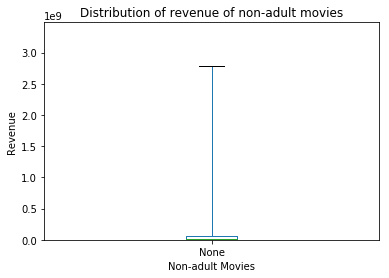

In [13]:
### answer Q5.1

# create a new dataframe which would hold only adult and revenue

boxes = movies.loc[:, ['adult','revenue']]

# create a new dataframe where the entries each have a non-zero revenue

box = boxes[boxes['revenue'].notnull()]

# iterate through the rows in the dataframe which would append the revenue of the movies into two global lists depending on whether they are adult movies or not

adult = []
non_adult = []
for index, row in box.iterrows():
    if (row[0] == True):
        adult.append(row[1])
    else:
        non_adult.append(row[1])

#create a series out of the lists and check if the lists are non-empty
# if empty, cannot plot a boxplot
# if non-empty, can plot a boxplot of that list where the whiskers is the range of values in that list

adult = pd.Series(adult)
if (len(adult) > 0):
    adult_min = int(adult.min()) *0.75 #adjust the lower boundary for what would be the y axis to allow better visualisation of the boxplot
    adult_max = int(adult.max()) *1.25 #adjust the upper boundary for what would be the y axis to allow better visualisation of the boxplot
    adult.plot(kind='box',whis='range', ylim = (adult_min, adult_max))
    plt.title('Distribution of revenue of adult movies')
    plt.xlabel('Adult Movies')
    plt.ylabel('Revenue')
    plt.show()
    
else:
    print("No adult movies")

non_adult = pd.Series(non_adult)
if (len(non_adult) > 0):
    non_adult_min = int(non_adult.min()) *0.75 #adjust the lower boundary for what would be the y axis to allow better visualisation of the boxplot
    non_adult_max = int(non_adult.max()) *1.25 #adjust the upper boundary for what would be the y axis to allow better visualisation of the boxplot
    non_adult.plot(kind='box',whis='range', ylim = (non_adult_min, non_adult_max))
    plt.title('Distribution of revenue of non-adult movies')
    plt.xlabel('Non-adult Movies')
    plt.ylabel('Revenue')
    plt.show()
    
else:
    print("No non-adult movies")
    

5.2 Histogram **(2 Marks)**

Draw a bar plot showing month of year (x-axis) versus total number of movies released on that month (y-axis). Each bar will represent the total number of movies released on a specific month across all years. 

Is there any relation between the month of the year and the total number of movies? Yes/No - Explain?

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


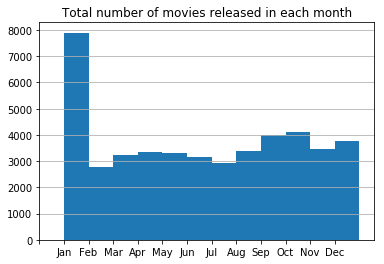

In [14]:
### answer code Q5.2


# create a new column to hold the month values extracted from the release date column

movies['months'] = movies['release_date'].dt.month
specific = movies[movies['months'].notnull()]

# iterate through the rows and append the month into a global list

freq = []
for index, row in specific.iterrows():
    freq.append(row[-1])
    
# plot histogram using the frequency of months in the list

plt.hist(freq, bins = 12, range=(1,13))
plt.xticks(range(13), list(calendar.month_abbr))
plt.axes().yaxis.grid(True, which='major')
plt.title('Total number of movies released in each month')
plt.show()


5.3 Scatter plot **(3 Marks)**

In this question, we will analyze the relation between few columns in the movies dataset. Draw four plots with the following four scatter/line plots:
    
    1- Non-zero revenue movies (x-axis) versus number of genres.
    2- Non-zero revenue movies (x-axis) versus release year.
    3- Non-zero revenue movies (x-axis) versus runtime.
    4- Non-zero revenue movies (x-axis) versus vote average.
    
Pick one of the four plots and justify/explain the relation between the two attributes. You should mention whether the relation is positive, negative or random. Did you expect this type of relation, Yes/No? Why?

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


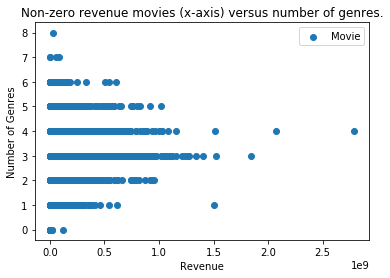

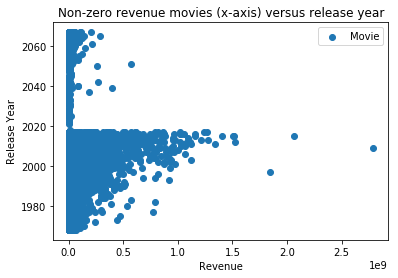

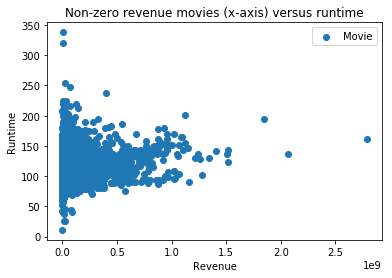

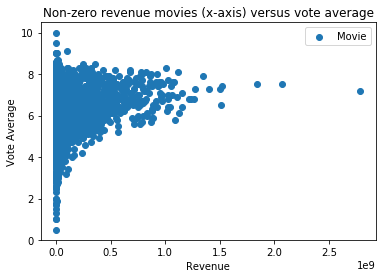

In [15]:
### answer Q5.3

# create a new dataframe to hold the movies with non-zero revenues

non_zero = movies[movies['revenue'].notnull()]

# create a list to hold the number of genres each movie has

number_of_genres = []
for row in non_zero['genres_cleaned']:
    number_of_genres.append(len(row))

# create a column to hold the number of genres each movie has

non_zero['number_genres'] = number_of_genres

# plot a scatter plot with the specific columns and proper legends

plt.scatter(non_zero.loc[:,'revenue'],non_zero.loc[:,'number_genres'],label='Movie')
plt.xlabel('Revenue')
plt.ylabel('Number of Genres')
plt.title('Non-zero revenue movies (x-axis) versus number of genres.')
plt.legend()
plt.show()

plt.scatter(non_zero.loc[:,'revenue'],non_zero.loc[:,'release_year'],label = 'Movie')
plt.xlabel('Revenue')
plt.ylabel('Release Year')
plt.title('Non-zero revenue movies (x-axis) versus release year')
plt.legend()
plt.show()

plt.scatter(non_zero.loc[:,'revenue'],non_zero.loc[:,'runtime'],label = 'Movie')
plt.xlabel('Revenue')
plt.ylabel('Runtime')
plt.title('Non-zero revenue movies (x-axis) versus runtime')
plt.legend()
plt.show()

plt.scatter(non_zero.loc[:,'revenue'],non_zero.loc[:,'vote_average'],label= 'Movie')
plt.xlabel('Revenue')
plt.ylabel('Vote Average')
plt.title('Non-zero revenue movies (x-axis) versus vote average')
plt.legend()
plt.show()


5.4 Pie chart **(2 Marks)**

Create a pie chart showing the number of movies for each genre. For example, if a movie is classified as both comedey and action then the count for each of the action and comedey slices should be increased by 1. Each slice of the pie should have a different colour and contain a percentage number listing its relative size. Also, each slice of the pie should have a label next to it indicating which genre it corresponds to.

(-1.1218047327212128,
 1.1010383206057721,
 -1.1037026439730964,
 1.1004909483391305)

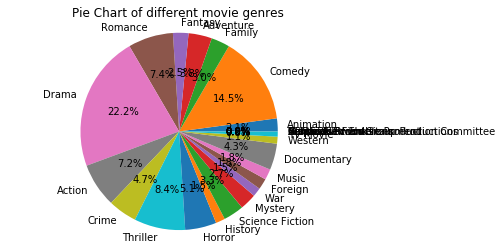

In [16]:
### answer Q5.4

# iterate throgh the rows holding the list of genres and  return into a global dictionary that would keep the total number of times a movie of a specific genre was released

genre = {}
for row in movies['genres_cleaned']:
    for x in row:
        if x  in genre:
            genre[x] += 1
        else:
            genre[x] = 1
            
# create two lists: one to hold the genres and another to hold the number of movies are in a specific genre

values = list(genre.values())
keys = list(genre.keys())

# plot a circular pie chart with the labels are the genres

plt.pie(values, explode = None, labels = keys, autopct='%1.1f%%')
plt.title('Pie Chart of different movie genres')
plt.axis('equal')


5.5 Parallel co-ordinates **(4 Marks)**

In this question, we will the parallel co-ordinates plot to visualize the trend/relation between some of the features in the movies dataset. You should write the code that implements the following steps:

1. Delete all movies (rows) with missing values in any of the following features: budget, runtime, popularity, vote_average, and revenue. 

2. Then for each of the features, normalise its values to lie within the range [0-1] (0 to 1 inclusive). Use the the following formula for normalising a feature:

** $newvalue = (oldvalue - min) / (max - min) $ ** where min is the minimum value for the feature, max is the maximum value for the feature, newvalue is the normalised value for the feature and oldvalue is the old (un-normalised value).

3. Using these normalised features, compute the mean budget, runtime, popularity, vote_average, and revenue for each year. 

4. Finally, draw a parallel co-ordinates plot, each line correspondes to a different year. The ordering of the features for the plot should be budget(leftmost), runtime, popularity, vote_average, and revenue(rightmost). 

Colour the movies with $release\_year < 2000$ in red,  $2000 \geqslant release\_year < 2010 $ in green and $release\_year \geqslant 2010$ in blue. Provide a legend mapping colours to day type.

From the plot, can you see any relation between the revenue and popularity features? Yes/No- Explain? 

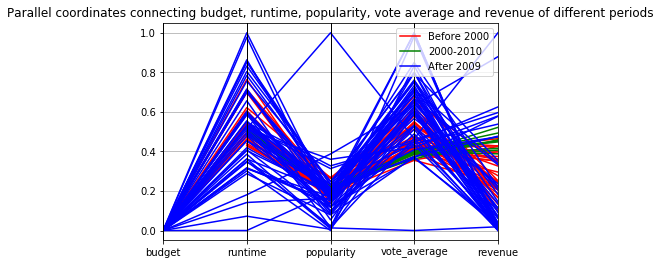

In [17]:
### answer Q5.5

# create a new dataframe to hold the movies with no missing features

features = ['budget', 'runtime', 'popularity', 'vote_average', 'revenue','release_year']
complete_movies = movies.loc[:,features]
for x in features:
    complete_movies = complete_movies[complete_movies[x].notnull()]     
    
# create an empty dataframe with the desired columns

non_missing = pd.DataFrame(columns=features)

# for each year find the means of the desired features

for y in range(int(complete_movies['release_year'].min()), int(complete_movies['release_year'].max()+1)):
    each_year = complete_movies[complete_movies['release_year'] == y]
    mean_budget = each_year['budget'].mean()
    mean_runtime = each_year['runtime'].mean()
    mean_popularity = each_year['popularity'].mean()
    mean_vote = each_year['vote_average'].mean()
    mean_revenue = each_year['revenue'].mean()
    
    # create a new dataframe to hold the means and append it to the main dataframe
    
    means = pd.DataFrame([[mean_budget, mean_runtime, mean_popularity,mean_vote,mean_revenue,y]], columns = features)
    non_missing = non_missing.append(means, ignore_index = True)

# split them according to their release years

years = []
for x in non_missing['release_year']:
    if (x > 2009):
        years.append('After 2009')
    elif (x < 2000):
        years.append('Before 2000')
    else:
        years.append('2000-2010')

# normalise the data

non_missing['budget'] = (non_missing['budget']-non_missing['budget'].min())/(non_missing['budget'].max()-non_missing['budget'].min())
non_missing['runtime'] = (non_missing['runtime']-non_missing['runtime'].min())/(non_missing['runtime'].max()-non_missing['runtime'].min())
non_missing['popularity'] = (non_missing['popularity']-non_missing['popularity'].min())/(non_missing['popularity'].max()-non_missing['popularity'].min())
non_missing['vote_average'] = (non_missing['vote_average']-non_missing['vote_average'].min())/(non_missing['vote_average'].max()-non_missing['vote_average'].min())
non_missing['revenue'] = (non_missing['revenue']-non_missing['revenue'].min())/(non_missing['revenue'].max()-non_missing['revenue'].min())
non_missing['years'] = years

# plot the parallel coordinates

parallel_coordinates(non_missing[['budget','runtime','popularity','vote_average','revenue','years']],'years',color=['r','g','b'])
plt.title('Parallel coordinates connecting budget, runtime, popularity, vote average and revenue of different periods')
plt.show()


### Marking scheme

Correctness (39 marks): For each of the 5 questions a mark will be allocated for level of correctness (does it provide the right answer, is the logic right), according to the number in parentheses next to each question. Note that your code should work for any data input formatted in the same way as Movies\_tmdb.csv. E.g. if a random sample of 20,000 records was taken from Movies\_tmdb.csv, your code should provide a correct answer if this was instead used as the input.

Correctness will also take into account the readability and labelling provided for any plots and figures (plots should include title of the plot, labels/scale on axes, names of axes, and legends for colours where appropriate).

Coding style <span style="color:red">**(1 Mark)**</span>: Mark will be allocated for coding style. In particular the following aspects will be considered:

- Formatting of code (e.g. use of indentation and overall readability for a human)   
- Code modularity and flexibility. Use of functions or loops where appropriate, to avoid redundant or excessively verbose definitions of code.
- Use of python library functions (you should avoid reinventing logic if a library function can be used instead)
- Code commenting and clarity of logic. You should provide comments about the logic of our code for each question, so that it can be easily understood by the marker.

### Submission Instructions
Via the LMS, submit a jupyter notebook containing the code. Make sure you get a submission receipt via email. If you didn't get a receipt via email, this means we didn't receive your submission and it will be considered as late submission.

### Other
Extensions and Late Submission Penalties: If requesting an extension due to illness, please submit a medical certificate to the lecturer. If there are any other exceptional circumstances, please contact the lecturer with plenty of notice. Late submissions without an approved extension will attract a penalty of 10% of the marks available per 24hr period (or part thereof)
that it is late. E.g. A late submission will be penalised 2 marks if 4 hours late, 4 marks if 28 hours late, 6 marks if 50 hours late, 8 marks if 73 hours late, 10 marks if 106 hours late, etc.

Phase 1 is expected to require 20-24 hours work.

### Academic Honesty

You are expected to follow the academic honesty guidelines on the University website
https://academichonesty.unimelb.edu.au

### Further Information

A project discussion forum has also been created on the subject LMS. Please use this in the first instance if you have questions, since it will allow discussion and responses to be seen by everyone. The Phase 1 project page will also contain a list of frequently asked questions.